In [ ]:
!pip install transformers datasets --upgrade

  Using cached datasets-3.5.1-py3-none-any.whl.metadata (19 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+c

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("debarshichanda/goemotions")

print("Path to dataset files:", path)

100%|██████████| 17.6M/17.6M [00:01<00:00, 9.82MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/debarshichanda/goemotions/versions/6


# **Load and Explore the GoEmotions Dataset**

In [ ]:
from datasets import load_dataset

# Load the GoEmotions dataset
dataset = load_dataset("go_emotions")
print("Dataset Splits:", dataset)

# Print a sample example
print("\nSample Example:\n", dataset["train"][0])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.40k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/2.77M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/350k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/347k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/43410 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5426 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5427 [00:00<?, ? examples/s]

Dataset Splits: DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 43410
    })
    validation: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5426
    })
    test: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5427
    })
})

Sample Example:
 {'text': "My favourite food is anything I didn't have to cook myself.", 'labels': [27], 'id': 'eebbqej'}


# **Preprocess the Data (convert multi-label to single label)**

In [ ]:
# Select only the first label from the list and remove the 'labels' field
def preprocess_function(example):
    example["label"] = example["labels"][0] if len(example["labels"]) > 0 else 0
    del example["labels"]
    return example

dataset = dataset.map(preprocess_function)
print("\nPreprocessed Sample:\n", dataset["train"][0])


Map:   0%|          | 0/43410 [00:00<?, ? examples/s]

Map:   0%|          | 0/5426 [00:00<?, ? examples/s]

Map:   0%|          | 0/5427 [00:00<?, ? examples/s]


Preprocessed Sample:
 {'text': "My favourite food is anything I didn't have to cook myself.", 'id': 'eebbqej', 'label': 27}


# **Tokenize the Text**

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def tokenize_function(example):
    return tokenizer(example["text"], truncation=True, padding="max_length", max_length=128)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Format the tokenized dataset for PyTorch
tokenized_datasets.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

print("\nTokenized Sample:\n", tokenized_datasets["train"][0])


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/43410 [00:00<?, ? examples/s]

Map:   0%|          | 0/5426 [00:00<?, ? examples/s]

Map:   0%|          | 0/5427 [00:00<?, ? examples/s]


Tokenized Sample:
 {'label': tensor(27), 'input_ids': tensor([ 101, 2026, 8837, 2833, 2003, 2505, 1045, 2134, 1005, 1056, 2031, 2000,
        5660, 2870, 1012,  102,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0]), 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0

# **Load BERT Model for Sequence Classification**

In [ ]:
from transformers import AutoModelForSequenceClassification

# 28 classes for emotions
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=28)
print("\nModel Loaded: BERT-base with classification head for 28 labels")

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Model Loaded: BERT-base with classification head for 28 labels


# **Set Training Arguments & Trainer**

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=2,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=100,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
)


# **Train the Model**

In [ ]:
print("Starting Training...")
trainer.train()
print("Training Completed")


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


Starting Training...


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: l216240 (nucesfast) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
100,2.937000
200,2.586900
300,2.387800
400,2.243100
500,2.072200
600,1.977100
700,1.948500
800,1.847800
900,1.806200
1000,1.735500


Training Completed


# **Evaluate the Model**

In [ ]:
# Evaluate on validation set
metrics = trainer.evaluate()
print("\n Evaluation Metrics:\n", metrics)


 Evaluation Metrics:
 {'eval_loss': 1.3628463745117188, 'eval_runtime': 38.8799, 'eval_samples_per_second': 139.558, 'eval_steps_per_second': 17.464, 'epoch': 2.0}


# **Save the Fine-Tuned Model**

In [ ]:
# Save model and tokenizer
model.save_pretrained("./fine_tuned_bert_goemotions")
tokenizer.save_pretrained("./fine_tuned_bert_goemotions")

print(" Model and tokenizer saved successfully!")


 Model and tokenizer saved successfully!


# **Predict Emotion on New Text (Custom Input)**

In [ ]:
import torch
import numpy as np

emotions = [
    'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion',
    'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment',
    'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism',
    'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral'
]

def predict_emotion(text):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.eval()
    model.to(device)

    # Tokenize and move inputs to device
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True).to(device)

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        probs = torch.nn.functional.softmax(logits, dim=1)

    # Get top prediction and confidence
    predicted_idx = torch.argmax(probs, dim=1).item()
    predicted_label = emotions[predicted_idx]
    confidence = probs[0, predicted_idx].item()

    return predicted_label, round(confidence, 3)

# Test the function
text = "I’m wondering who will be the president next year"
emotion, confidence = predict_emotion(text)
print(f"\nText: \"{text}\"\nPredicted Emotion: {emotion} ({confidence * 100:.1f}%)")



Text: "I’m wondering who will be the president next year"
Predicted Emotion: curiosity (45.9%)


# **Visualization**

**TOP 5 Predicted Emotions**

In [ ]:
pip install matplotlib seaborn


<ipython-input-45-6ea520436a7f>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_values, y=top_emotions, palette="viridis")


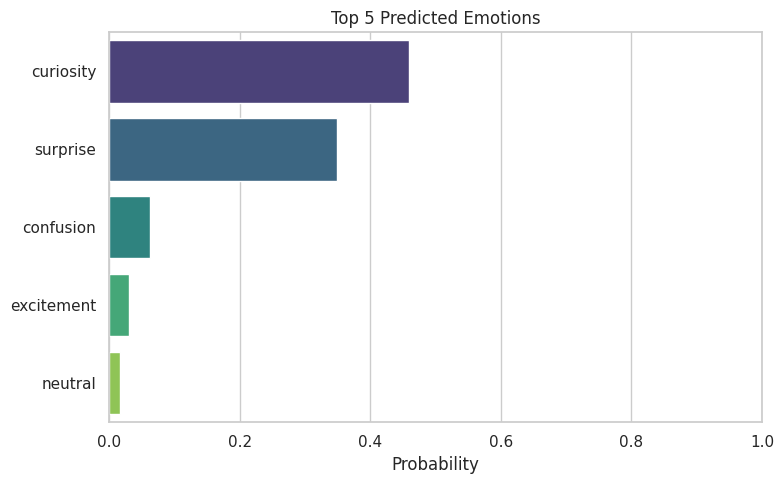

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
tokenizer = AutoTokenizer.from_pretrained("./fine_tuned_bert_goemotions")
model = AutoModelForSequenceClassification.from_pretrained("./fine_tuned_bert_goemotions")

emotions = [
    'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion',
    'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment',
    'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism',
    'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral'
]

def plot_emotion_probs(probs_tensor, emotions):
    probs = probs_tensor[0].cpu().numpy()
    top_indices = np.argsort(probs)[::-1][:5]  # Top 5 emotions

    top_emotions = [emotions[i] for i in top_indices]
    top_values = [probs[i] for i in top_indices]

    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 5))
    sns.barplot(x=top_values, y=top_emotions, palette="viridis")
    plt.title("Top 5 Predicted Emotions")
    plt.xlabel("Probability")
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.show()
text = "I’m wondering who will be the president next year"

# Tokenize the text
inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)

with torch.no_grad():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    inputs = inputs.to(device)
    model.to(device)
    # Make predictions
    outputs = model(**inputs)
    logits = outputs.logits
    probs = torch.nn.functional.softmax(logits, dim=1)

# Plot the probabilities
plot_emotion_probs(probs, emotions)